### Importações

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('data.csv')

### Análise

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Verificando relação de faixa etária e sobrevivência

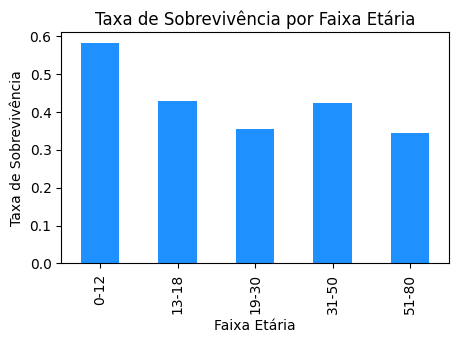

In [66]:
bins = [0, 12, 18, 30, 50, 80]
labels = ['0-12', '13-18', '19-30', '31-50', '51-80']

age_groups = pd.cut(df['Age'], bins=bins, labels=labels)
age_survival = df.groupby(age_groups, observed=False)['Survived'].mean()

plt.figure(figsize=(5, 3))
age_survival.plot(kind='bar', color='dodgerblue')

plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')

plt.show()

#### Verificando relação de gênero e sobrevivência


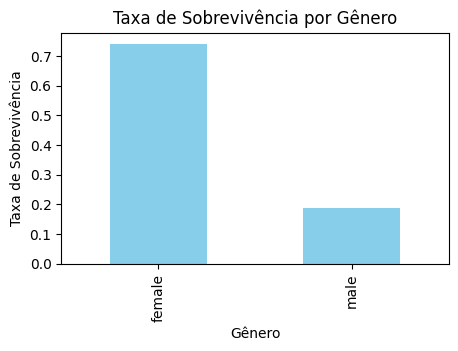

In [67]:
gender_survival = df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(5, 3))
gender_survival.plot(kind='bar', color='skyblue')

plt.title('Taxa de Sobrevivência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência')

plt.show()


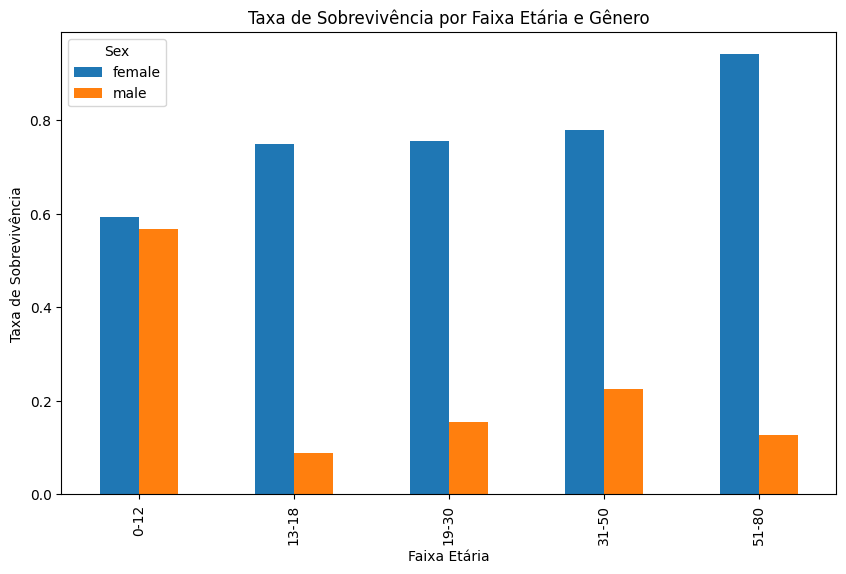

In [68]:
bins = [0, 12, 18, 30, 50, 80]
labels = ['0-12', '13-18', '19-30', '31-50', '51-80']

age_groups = pd.cut(df['Age'], bins=bins, labels=labels)

age_gender_survival = df.groupby([age_groups, 'Sex'], observed=False)['Survived'].mean().unstack()

age_gender_survival.plot(kind='bar', figsize=(10, 6))  # Ajustando o tamanho da figura aqui

plt.title('Taxa de Sobrevivência por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')

plt.show()

#### Verificando relação de classe e sobrevivência


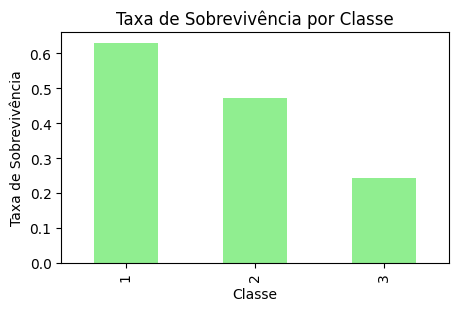

In [69]:
class_survival = df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(5, 3))
class_survival.plot(kind='bar', color='lightgreen')

plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')

plt.show()


#### Verificando relação de ponto de embarque e sobrevivência


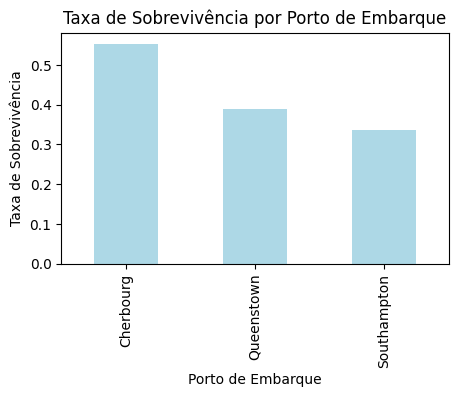

In [70]:
embarked_survival = df.groupby('Embarked')['Survived'].mean()

labels = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
embarked_survival.index = embarked_survival.index.map(labels)

plt.figure(figsize=(5, 3))
embarked_survival.plot(kind='bar', color='lightblue')

plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência')

plt.show()


#### Verificando relação de taxa de sobrevivência por tarifa


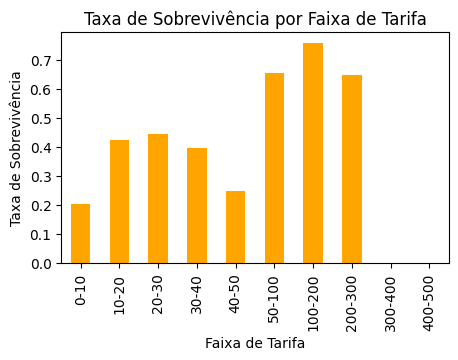

In [71]:
fare_bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
fare_labels = [f'{fare_bins[i]}-{fare_bins[i+1]}' for i in range(len(fare_bins)-1)]

fare_groups = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)
fare_survival = df.groupby(fare_groups, observed=False)['Survived'].mean()

plt.figure(figsize=(5, 3))
fare_survival.plot(kind='bar', color='orange')

plt.title('Taxa de Sobrevivência por Faixa de Tarifa')
plt.xlabel('Faixa de Tarifa')
plt.ylabel('Taxa de Sobrevivência')

plt.show()


#### Relação de ponto de embarque, classe, tarifa e sobrevivência

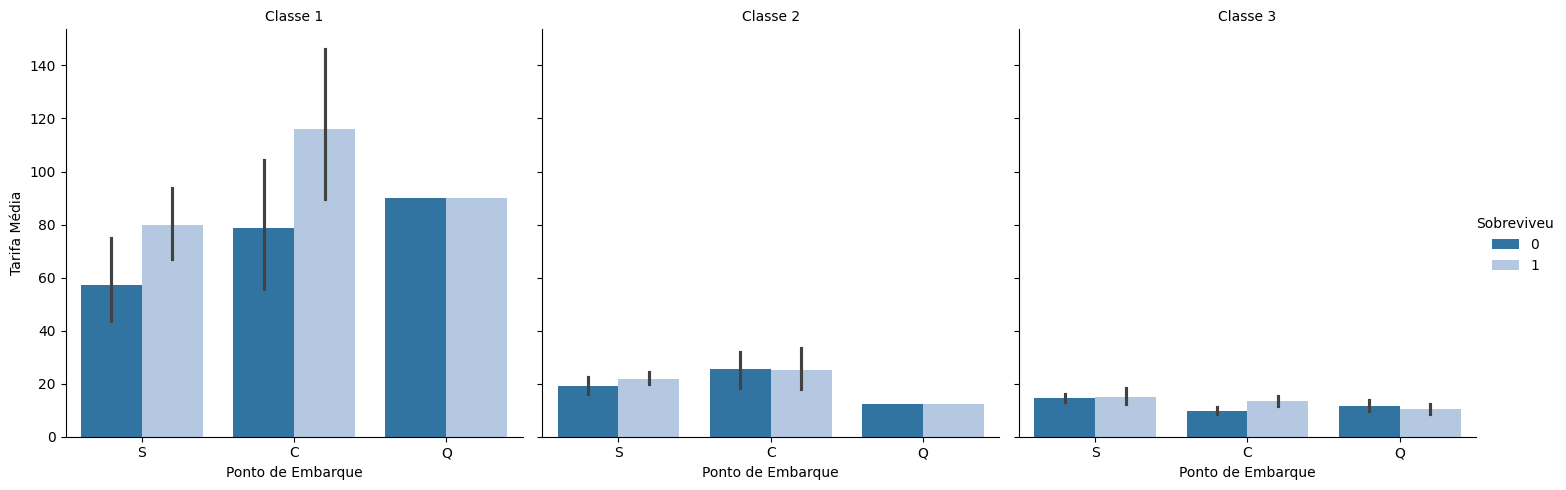

In [72]:
grid = sns.catplot(
    data=df, kind="bar",
    x="Embarked", y="Fare", hue="Survived",
    col="Pclass",
    palette="tab20"
)

grid.set_axis_labels("Ponto de Embarque", "Tarifa Média")
grid.set_titles("Classe {col_name}")
grid._legend.set_title('Sobreviveu')

plt.show()

#### Verificando relação de taxa de sobrevivência por tamanho da família

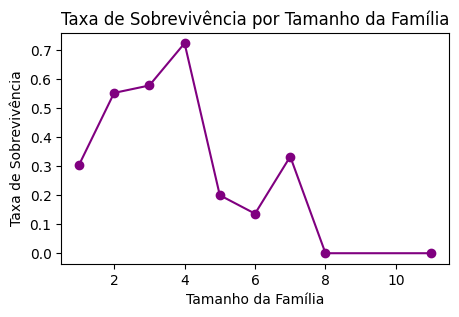

In [73]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

family_survival = df.groupby('FamilySize')['Survived'].mean()

plt.figure(figsize=(5, 3))
family_survival.plot(kind='line', marker='o', color='purple')

plt.title('Taxa de Sobrevivência por Tamanho da Família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Taxa de Sobrevivência')

plt.show()


### Tratamento:

In [74]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

#### Tratando valores faltantes

In [75]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # Preenchendo com a mediana
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Preenchendo com o valor mais frequente

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

#### Excluindo colunas menos relevantes

In [77]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,28.0,1,2,23.4500,S,4
889,1,1,male,26.0,0,0,30.0000,C,1


#### Separando entre variáveis categóricas e numéricas

In [78]:
categorical_cols = ['Sex', 'Embarked', 'Pclass']
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

#### Separando entre previsores e classe

In [79]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

#### Transformando as colunas categóricas em numéricas e padronizando valores


In [80]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Padroniza as colunas numéricas para terem média zero e desvio padrão um
        ('cat', OneHotEncoder(), categorical_cols) # Transforma as colunas categóricas em uma matriz esparsa de variáveis binárias
    ])

#### Dividindo entre conjuntos de treino e teste

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Aplicando o preprocessamento

In [82]:
X_train = preprocessor.fit_transform(X_train) # Ajusta os parâmetros dos transformadores aos dados de treino e aplica as transformações, resultando em X_train pré-processado.
X_test = preprocessor.transform(X_test) # Aplica as transformações ajustadas aos dados de teste sem reajustar os parâmetros, resultando em X_test pré-processado de forma consistente com X_train.

#### Exibindo os conjuntos

In [83]:
# Convertendo os dados transformados em dataframes com nomes de colunas apropriados
X_train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

print("Dados de Treino - Previsores:")
X_train_df.head()

Dados de Treino - Previsores:


,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3
0,-1.919719,-0.474161,1.998853,0.980998,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.077252,-0.474161,-0.479327,-0.469634,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-2.150028,0.348687,0.759763,-0.406136,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.536903,0.348687,1.998853,-0.080232,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.074289,0.348687,0.759763,-0.109651,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [84]:
print("Dados de Treino - Classe:")
y_train.head()

Dados de Treino - Classe:


445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

In [85]:
print("Dados de Teste - Previsores:")
X_test_df.head()

Dados de Teste - Previsores:


,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3
0,-0.077252,0.348687,0.759763,-0.325478,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.153056,-0.474161,-0.479327,-0.418557,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.691408,-0.474161,-0.479327,-0.469061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.766180,-0.474161,0.759763,0.022737,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.152025,0.348687,-0.479327,-0.404010,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [86]:
print("Dados de Teste - Classe:")
y_test.head()

Dados de Teste - Classe:


709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [87]:
X_train_df.shape, y_train.shape


((623, 12), (623,))

In [88]:
X_test_df.shape, y_test.shape


((268, 12), (268,))